# Experiment 1

- In this Experiment we need to check if the pheromone concertration is more on the short or long arc

## 1.1 Checking Pheromone on arcs

- First we need to store the long path and the short path
- After Each run is terminated, we will compare where there is more pheromone
- The Long path is `[0, 1, 2, 3, 4, 5, 6, 7, 8]`
- The short paths are `[0, 9, 10, 12, 13, 8]` and `[0, 9, 14, 17, 13, 8]`

## 1.2 Calculating Pheromone on Path

- the amount of pheromone on the path is the sum of pheromones on each arc in the path
- we demostrate below how we can compare the total amount of pheromone on the paths

In [1]:
# Make a Pheromone Matrix

import random
Pheromone = [[random.random() for i in range(18)] for j in range(18)]

longpath = [0, 1, 2, 3, 4, 5, 6, 7, 8]
Shortpath1 = [0, 9, 10, 12, 13, 8]
Shortpath2 = [0, 9, 14, 17, 13, 8]

LongPher = [Pheromone[j][longpath[i+1]] for i,j in enumerate(longpath) if i < len(longpath)-1]
ShortPher1 = [Pheromone[j][Shortpath1[i+1]] for i,j in enumerate(Shortpath1) if i < len(Shortpath1)-1]
ShortPher2 = [Pheromone[j][Shortpath2[i+1]] for i,j in enumerate(Shortpath2) if i < len(Shortpath2)-1]

sum(LongPher), sum(ShortPher1), sum(ShortPher2)

(4.09356032136258, 2.749586599635782, 2.4807152995392303)

# 1.3 Define Experiment Parameters
- In this experiment, we are going to run 100 trials
- One trial will undergo 110 iterations 
- Ant populations will be incremented as follows: 1, 2, 4, 8, ... , 512
- alpha and rho will be 2 and 0 respectively
- At the end of each trial, we will use the pheromone matrix to check if pheromone is more on the long or short path

In [2]:
Trials = 100
Num_Ants = [i**2 for i in range(1,20)]
alpha = 2
rho = 0

longpath = [0, 1, 2, 3, 4, 5, 6, 7, 8]
Shortpath1 = [0, 9, 10, 12, 13, 8]
Shortpath2 = [0, 9, 14, 17, 13, 8]

# 1.4 Define Function Experimental Runs

In [3]:
def RunExperiment(numtrials, num_ants, alpha, rho):
    Longs = 0
    
    i = 0
    while i < numtrials:
        
        #PRM = SACO(EDBM, takeoff, destination, population, alpha, rho, iterations)["PRM"]
        PRM = [[random.random() for i in range(18)] for j in range(18)]
        
        LongPher = sum([PRM[j][longpath[i+1]] for i,j in enumerate(longpath) if i < len(longpath)-1])
        ShortPher1 = sum([PRM[j][Shortpath1[i+1]] for i,j in enumerate(Shortpath1) if i < len(Shortpath1)-1])
        ShortPher2 = sum([PRM[j][Shortpath2[i+1]] for i,j in enumerate(Shortpath2) if i < len(Shortpath2)-1])
        
        if LongPher > ShortPher1 and LongPher > ShortPher2:
            Longs += 1
        
        i += 1
    
    return Longs

for pop in Num_Ants:
    print(" For ", pop, " Ants the Number of Long Paths are ", RunExperiment(Trials, pop , alpha, rho), " in 100")

 For  1  Ants the Number of Long Paths are  88  in 100
 For  4  Ants the Number of Long Paths are  92  in 100
 For  9  Ants the Number of Long Paths are  91  in 100
 For  16  Ants the Number of Long Paths are  95  in 100
 For  25  Ants the Number of Long Paths are  83  in 100
 For  36  Ants the Number of Long Paths are  86  in 100
 For  49  Ants the Number of Long Paths are  93  in 100
 For  64  Ants the Number of Long Paths are  90  in 100
 For  81  Ants the Number of Long Paths are  93  in 100
 For  100  Ants the Number of Long Paths are  89  in 100
 For  121  Ants the Number of Long Paths are  91  in 100
 For  144  Ants the Number of Long Paths are  85  in 100
 For  169  Ants the Number of Long Paths are  85  in 100
 For  196  Ants the Number of Long Paths are  90  in 100
 For  225  Ants the Number of Long Paths are  92  in 100
 For  256  Ants the Number of Long Paths are  90  in 100
 For  289  Ants the Number of Long Paths are  81  in 100
 For  324  Ants the Number of Long Paths ar

# 1.5 Experiment Proper

- import the SACO algorithm 
- import the graph problems 
- Define experiment paramters and run 

In [4]:
import graphs
import SACOAs
graph = graphs.graph1

In [8]:
def RunExperiment(Trials, Num_Ants, alpha, rho):
    """ Trials: Number of trial runs 
        NUm_Ants: Population of ants int
        alpha: pheromone influence
        rho: evaporation rate 
        
        return number of Long paths found"""
    Longs = 0
    
    i = 0
    while i < Trials:
        
        #PRM = SACO(EDBM, takeoff, destination, population, alpha, rho, iterations)["PRM"]
        PRM = SACOAs.SACO(graph, takeoff, destination, Num_Ants, alpha, rho, 
                   iterations, dropout, bycost)["PRM"]

        LongPher = sum([PRM[j][longpath[i+1]] for i,j in enumerate(longpath) if i < len(longpath)-1])
        ShortPher1 = sum([PRM[j][Shortpath1[i+1]] for i,j in enumerate(Shortpath1) if i < len(Shortpath1)-1])
        ShortPher2 = sum([PRM[j][Shortpath2[i+1]] for i,j in enumerate(Shortpath2) if i < len(Shortpath2)-1])
        if LongPher > ShortPher1 and LongPher > ShortPher2:
            Longs += 1
        
        i += 1
    
    return Longs

In [20]:
Trials = 100
Num_Ants = [i**2 for i in range(1,5)]
alpha = 2
rho = 0
#----------------------------------------

# 1.5.1 Run with path dependent pheromone update

In [21]:

iterations = 100
takeoff = 0
destination = 8
dropout = False
bycost = True

for pop in Num_Ants:
    print(" For ", pop, " Ants the Number of Long Paths are ", RunExperiment(Trials, pop , alpha, rho), " in ", Trials)

 For  1  Ants the Number of Long Paths are  29  in  100
 For  4  Ants the Number of Long Paths are  9  in  100
 For  9  Ants the Number of Long Paths are  1  in  100
 For  16  Ants the Number of Long Paths are  0  in  100


# 1.5.1 Run with Constant pheromone update

In [12]:
iterations = 100
takeoff = 0
destination = 8
dropout = False
bycost = False

for pop in Num_Ants:
    print(" For ", pop, " Ants the Number of Long Paths are ", RunExperiment(Trials, pop , alpha, rho), " in ", Trials)

 For  1  Ants the Number of Long Paths are  2  in  25
 For  4  Ants the Number of Long Paths are  3  in  25
 For  9  Ants the Number of Long Paths are  2  in  25
 For  16  Ants the Number of Long Paths are  0  in  25


# 1.6 Bonus 

### Repeat Expeiments Using Graph 2

In [14]:
graph2 = graphs.graph2
graph2

[[0, 0, 0, 1, 0, 1, 0],
 [0, 0, 1, 1, 0, 0, 0],
 [0, 1, 0, 1, 1, 0, 0],
 [1, 1, 1, 0, 1, 1, 0],
 [0, 0, 1, 1, 0, 0, 1],
 [1, 0, 0, 1, 0, 0, 1],
 [0, 0, 0, 0, 1, 1, 0]]

In [15]:
iterations = 100
takeoff = 0
destination = 4
pop = 1
alpha = 1
rho = 0
dropout = False
bycost = True

SOLUTION = SACOAs.SACO(graph2, takeoff, destination, pop, alpha, rho, 
                   iterations, dropout, bycost)

In [16]:
SOLUTION["Ants"]["Ant1"]

[0, 3, 4]

In [17]:
import numpy as np
import matplotlib.pyplot as plt

data = np.array(SOLUTION["PRM"])
hm = plt.imshow(data, 'gray', origin='lower')

plt.colorbar(hm)

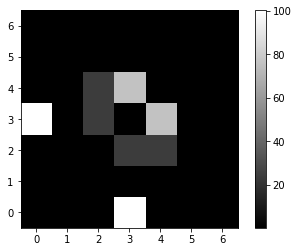

In [18]:
iterations = 100
takeoff = 0
destination = 4
pop = 1
alpha = 1
rho = 0
dropout = False
bycost = False

SOLUTION = SACOAs.SACO(graph2, takeoff, destination, pop, alpha, rho, 
                   iterations, dropout, bycost)

import numpy as np
import matplotlib.pyplot as plt

data = np.array(SOLUTION["PRM"])
hm = plt.imshow(data, 'gray', origin='lower')
plt.colorbar(hm)

In [19]:
SOLUTION["Ants"]["Ant1"]

[0, 3, 4]

# TODO

- Run the experiment and compare the pheromone intensities as done with graph1
- Compare the results for different pheromone update methods